In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
number=5
file = '../airline_Train_'+str(number)+'.csv'

df = pd.read_csv(file)
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
63,1960-04-01,461
64,1960-05-01,472
65,1960-06-01,535
66,1960-07-01,622
67,1960-08-01,606


In [4]:
m = NeuralProphet(seasonality_mode="multiplicative")
metrics = m.fit(df, freq="MS")

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.706% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 695


  0%|          | 0/105 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.14E-01, min: 3.09E-01


  0%|          | 0/105 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.14E-01, min: 3.78E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.09E-01
Epoch[695/695]: 100%|██████████| 695/695 [00:05<00:00, 138.73it/s, SmoothL1Loss=0.000631, MAE=9.36, RMSE=11, RegLoss=0]  


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.706% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.706% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - C:\Users\strub\anaconda3\envs\prophet39\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.816% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.816% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined freque

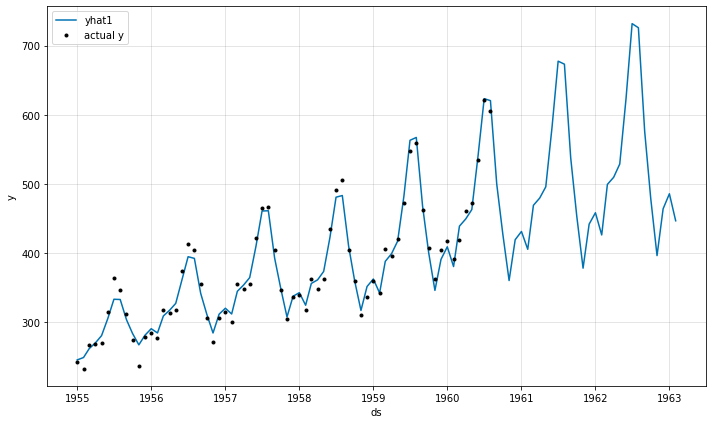

In [5]:
future = m.make_future_dataframe(df=df, periods=30)
future = m.make_future_dataframe(df, periods=30, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_forecast = m.plot(forecast)

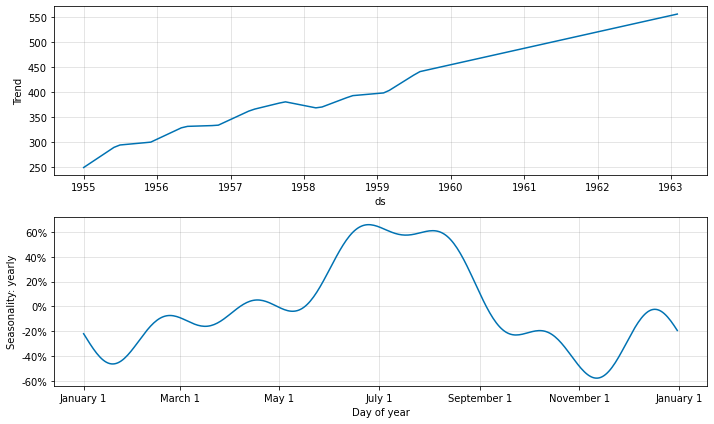

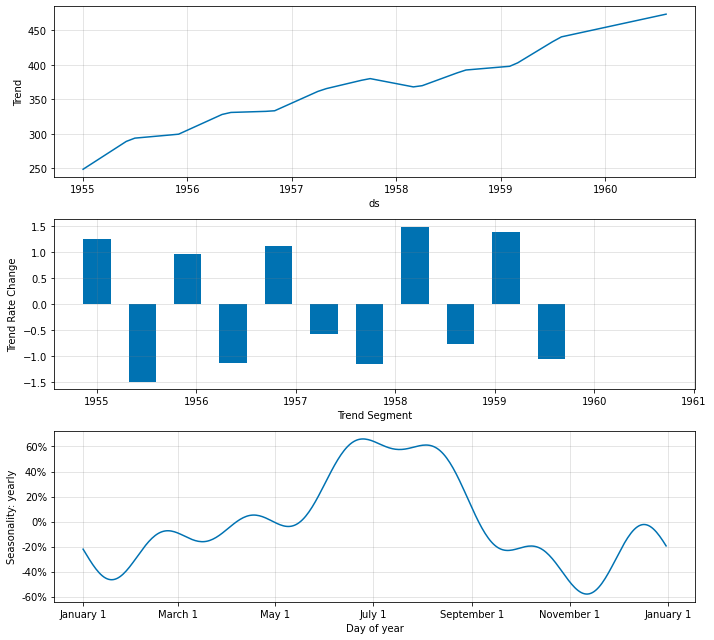

In [8]:
fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

In [5]:
NP_forecast=forecast[['ds', 'yhat1']].tail(30)
NP_forecast

,ds,yhat1
2692,2021-05-16,586.319702
2693,2021-05-17,1424.216187
2694,2021-05-18,1287.948242
2695,2021-05-19,1029.656006
2696,2021-05-20,878.079041
2697,2021-05-21,722.910767
2698,2021-05-22,69.552612
2699,2021-05-23,508.282440
2700,2021-05-24,1327.242554
2701,2021-05-25,1173.608398


In [6]:
file2 = 'Wiki_NP_Forecast_'+str(number)+'.csv'
NP_forecast.to_csv(file2,index=False)